<a href="https://colab.research.google.com/github/kahramankaya/python-project-1/blob/main/04_mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()



#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')


In [59]:
#path="/content/Data.zip"
#dest=download_url(URLs.MNIST_SAMPLE,path)  Gokay hocaya untar_data ıle download_url arasında kı farkı sor arastırdım ama tam anlamıyla anlamadım.

path=untar_data(URLs.MNIST_SAMPLE)


In [60]:
path.ls()


(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [61]:
(path/"train").ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [62]:
(path/"train/3").ls()



(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/4238.png'),Path('/root/.fastai/data/mnist_sample/train/3/54397.png'),Path('/root/.fastai/data/mnist_sample/train/3/34548.png'),Path('/root/.fastai/data/mnist_sample/train/3/14200.png'),Path('/root/.fastai/data/mnist_sample/train/3/13225.png'),Path('/root/.fastai/data/mnist_sample/train/3/18827.png'),Path('/root/.fastai/data/mnist_sample/train/3/26678.png'),Path('/root/.fastai/data/mnist_sample/train/3/50175.png'),Path('/root/.fastai/data/mnist_sample/train/3/49300.png'),Path('/root/.fastai/data/mnist_sample/train/3/25000.png')...]

In [63]:
threes=(path/"train/3").ls().sorted()
sevens=(path/"train/7").ls().sorted()
threes , sevens

((#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...],
 (#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.

In [64]:
img3=Image.open(threes[2])
img3

Here we are using the Image class from the Python Imaging Library (PIL), which is the most widely used Python package for opening, manipulating, and viewing images. Jupyter knows about PIL images, so it displays the image for us automatically.

In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a NumPy array or a PyTorch tensor. For instance, here's what a section of the image looks like, converted to a NumPy array:


In [65]:
array(img3)[0:4,0:3] ,  tensor(img3)


(array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=uint8),
 tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  18,  93, 164, 254, 255, 254, 254, 254, 151,   0,   0,   0,   0,   0,   0,   0,   0],
   

In [66]:
df=pd.DataFrame(tensor(img3))  # pay attention to resulting number

In [67]:
df.style.set_properties(**{'font-size':'10pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,18,93,164,254,255,254,254,254,151,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,13,36,151,253,253,253,253,253,253,218,239,213,10,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,89,253,253,253,245,172,82,82,82,2,148,253,150,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,89,253,252,171,54,0,0,0,0,37,177,253,188,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,17,151,51,0,0,0,0,0,40,229,253,253,147,0,0,0,0,0,0,0


In [68]:
three_tensor=[tensor(Image.open(m)) for m in threes ]
seven_tensor=[tensor(Image.open(n)) for n in sevens]
len(seven_tensor), len(three_tensor)


(6265, 6131)

<Axes: >

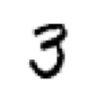

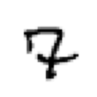

In [69]:
show_image(img3)
show_image(seven_tensor[2])


**we have combined all tensors into a single tensor . this new tensor is 28*28.**

In [70]:
stacked_seven=torch.stack(seven_tensor).float()/255
stacked_three=torch.stack(three_tensor).float()/255
stacked_seven.shape, stacked_three.shape


(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

In [71]:
len(stacked_three), len(stacked_seven.shape)

(6131, 3)

**burda 6131 tane goruntu var ve her goruntu 28*28 lık pıkselden olusuyormus**

In [72]:
stacked_three.ndim, stacked_three.shape

(3, torch.Size([6131, 28, 28]))

**Bu bize lıstelenmıs tum 7 ler ya da 3 lerın ortalamasını verır yanı genel olarak neye benzedıklerının ortalaması dıyebılırız.**

<Axes: >

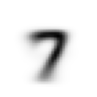

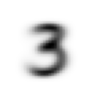

In [73]:
mean7=stacked_seven.mean(0)
show_image(mean7)
mean3=stacked_three.mean(0)
show_image(mean3)

**şimdi herhangı bır 7 nın ortalama bır 7 ye  olan uzaklıgını olcelım.**

In [74]:
tensor7_12=stacked_seven[12]
dist_7_abs=(tensor7_12-mean3).abs().mean()
dist_7_abs

tensor(0.1671)

**asagıda tensor ve numpy array leri ile ilgili bazı ıslemler: ** **kalın metin**

In [75]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [76]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [77]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [78]:
arr[:,1]

array([2, 5])

In [79]:
tns[:,1]

tensor([2, 5])

In [80]:
tns[0]

tensor([1, 2, 3])

In [81]:
tns[1,1:3]

tensor([5, 6])

In [82]:
tns+3

tensor([[4, 5, 6],
        [7, 8, 9]])

In [83]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [84]:
a_3 = stacked_three[1]
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [85]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape, len(valid_3_tens)


(tensor([0.1098, 0.1247, 0.1348,  ..., 0.1378, 0.1268, 0.1375]),
 torch.Size([1010]),
 1010)

In [86]:
tensor([1,2,3]) + tensor([1])

tensor([2, 3, 4])

**bır sayının 3 e aıt olup olmadıgını bılmek ıcın eger mean3 e olan uzaklıgı mean7 ye olan uzaklıgından az ıse o zaman o sayı 3 tur.**

In [87]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

**FLOAT ILE YAPMAK TRUE VE FALSE I 1 VE 0 YAPAR.**

In [88]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [89]:
is_3(valid_3_tens[0:50])

tensor([ True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True])

In [90]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s

(tensor(0.9168), tensor(0.9854))

In [91]:
xt=tensor([2.,5. ,7.]).requires_grad_()

In [92]:
def f(x): return (x**2).sum()

In [93]:
yt=f(xt)
yt.backward()

**burda x^2 turevı 2*x dır. verılen 2,5,7 degerlerını buraya koyunca bu noktada kı turev degerlerını bulduk.**

In [94]:
xt.grad

tensor([ 4., 10., 14.])

In [95]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

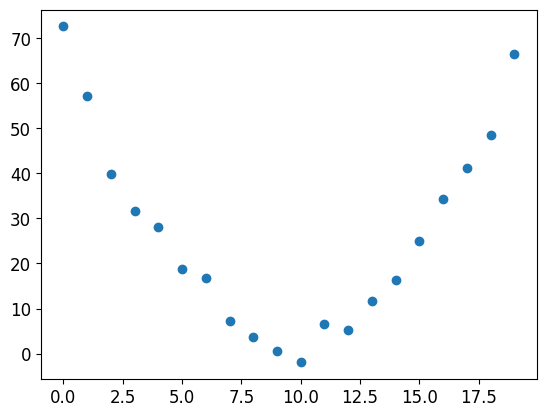

In [96]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [97]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

**hata maliyeti hesaplama**

In [98]:
def mse(preds, targets): return ((preds-targets)**2).mean()

requires_grad parametrelere turev uygulanacagını belırtmek ıcın kullanılır.

In [99]:
params = torch.randn(3).requires_grad_()

In [100]:
orig_params = params.clone()

önce fonksıyona gıttı daha sonra da bunun hata oranını buldu. burda speed yukarda belırledıgımız gercek y degerlerıdır.

In [101]:
preds = f(time, params)
loss=mse(preds,speed); loss

tensor(1113.6345, grad_fn=<MeanBackward0>)

In [102]:
loss.backward()
params.grad

tensor([7071.7754,  454.8004,   12.3632])

sonda kı none yaptık her seferınde gradyanları sıfırlasın tekrardan alsın dıye

In [103]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [104]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(params.data,"-----" , loss.item())

    #neden burda return preds ıfadesı kullanıldı.
    return preds

In [105]:
for i in range(10): apply_step(params)

tensor([ 0.1289,  0.4614, -0.2050]) ----- 753.3248901367188
tensor([ 0.1155,  0.4605, -0.2049]) ----- 685.1405029296875
tensor([ 0.1096,  0.4601, -0.2047]) ----- 672.235107421875
tensor([ 0.1071,  0.4599, -0.2045]) ----- 669.7901000976562
tensor([ 0.1060,  0.4599, -0.2044]) ----- 669.3246459960938
tensor([ 0.1055,  0.4598, -0.2042]) ----- 669.233642578125
tensor([ 0.1053,  0.4598, -0.2040]) ----- 669.2136840820312
tensor([ 0.1052,  0.4598, -0.2038]) ----- 669.20703125
tensor([ 0.1052,  0.4598, -0.2036]) ----- 669.2029418945312
tensor([ 0.1052,  0.4598, -0.2034]) ----- 669.1993408203125


7 ve 3 lerı cat kullanarak bırlestırdık. daha sonra vıew kullanarak bu tensoru yenıden sekıllendırdık.

In [107]:
train_x = torch.cat([stacked_three, stacked_seven]).view(-1, 28*28)